In [1]:
%pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.5 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 7.4 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=5d46a6ba897b97633a2a77602ae2cfd40d1166ef5b00cc50244d653571e3ae32
  Stored in directory: /home/codespace/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


***
# ***Imports***
***

## ***Library Imports***

In [38]:
from pyspark.sql import SparkSession
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## ***Creating a Spark Session***

In [4]:
spark = SparkSession.builder.appName('Wine Classification').getOrCreate()

23/10/24 07:00:39 WARN Utils: Your hostname, codespaces-ff8138 resolves to a loopback address: 127.0.0.1; using 172.16.5.4 instead (on interface eth0)
23/10/24 07:00:39 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/24 07:00:39 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
spark

## ***Dataset***

In [19]:
df = pd.read_csv("/workspaces/Wine-Classification/wine.csv")

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


***
# ***Exploratory Data Analysis***
***

## ***Data Overview***

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [34]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [35]:
df.tail()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [22]:
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [26]:
missing_values  = df.isna().sum()
print(f'The number of missing values in each column is: \n {missing_values}.')


The number of missing values in each column is: 
 Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64.


In [37]:
print(f'The number of duplicated rows in this dataframe is: \n {df.duplicated().sum()}')

The number of duplicated rows in this dataframe is: 
 0


## ***Visualizations***

### ***Univariate Analysis***

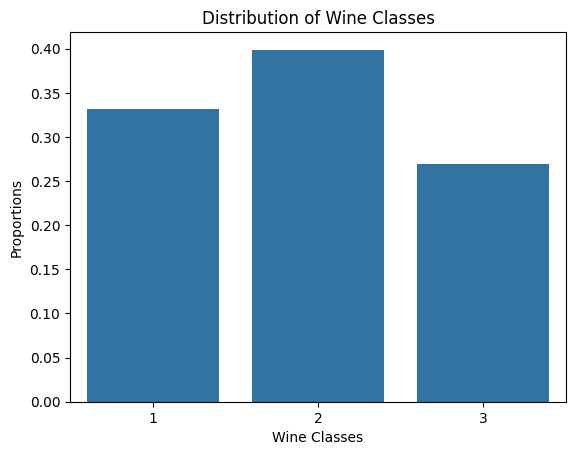

In [39]:
proportions = df['Wine'].value_counts(normalize=True)
sns.barplot(x=proportions.index, y=proportions.values )
plt.title("Distribution of Wine Classes")
plt.xlabel("Wine Classes")
plt.ylabel("Proportions")
plt.show()

In [40]:
def histogram(feature, data):
    sns.histplot(data=data, x=df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

    return plt.show()

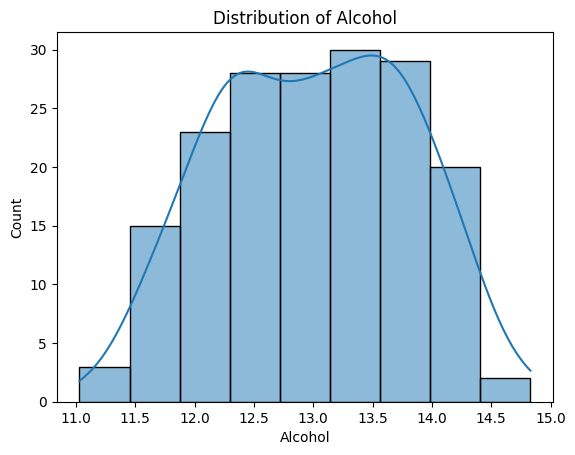

In [42]:
histogram('Alcohol', df)

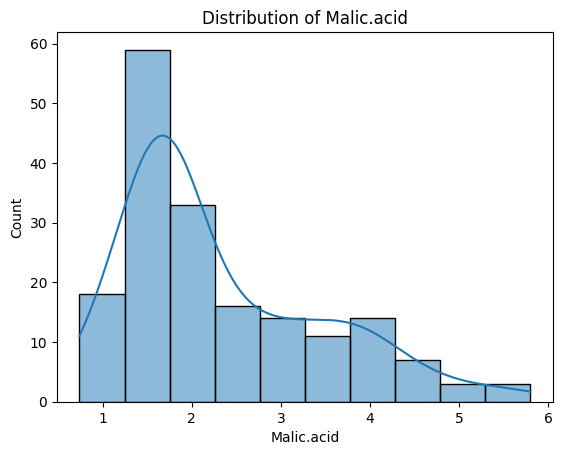

In [43]:
histogram('Malic.acid', df)

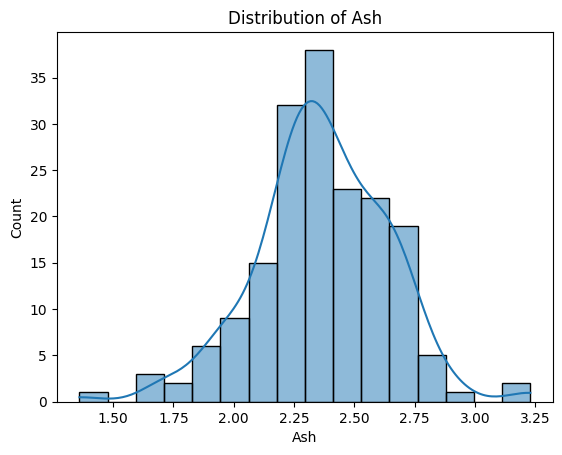

In [44]:
histogram('Ash', df)

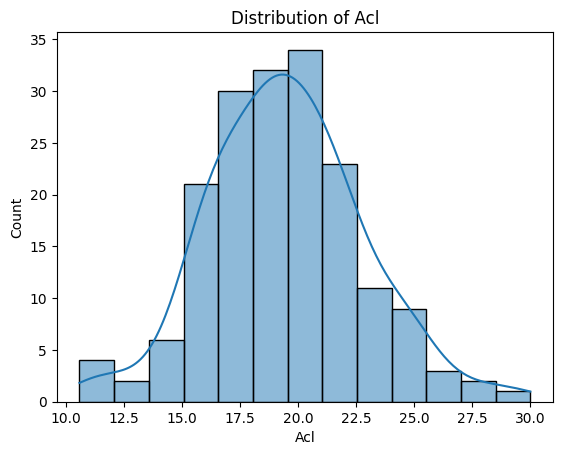

In [45]:
histogram('Acl', df)

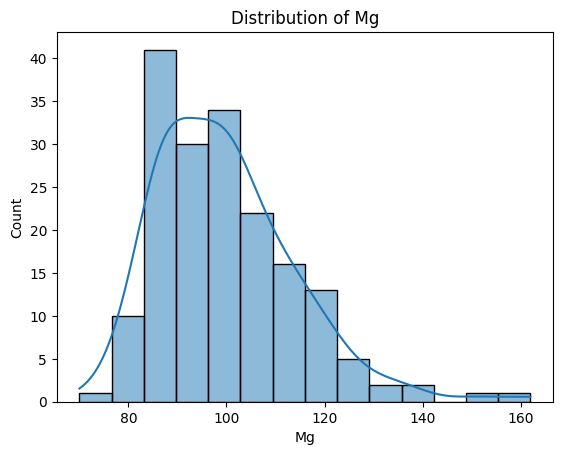

In [46]:
histogram('Mg', df)

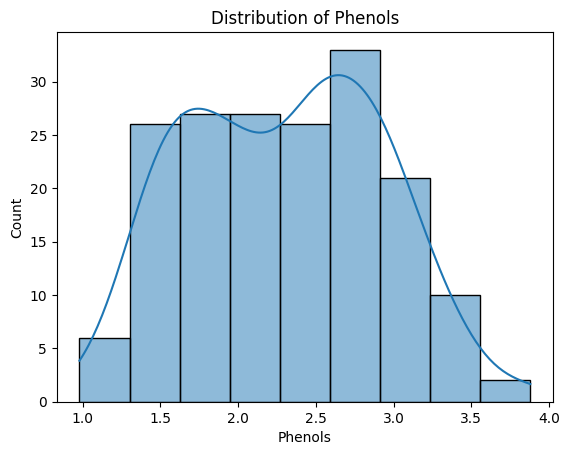

In [47]:
histogram('Phenols', df)

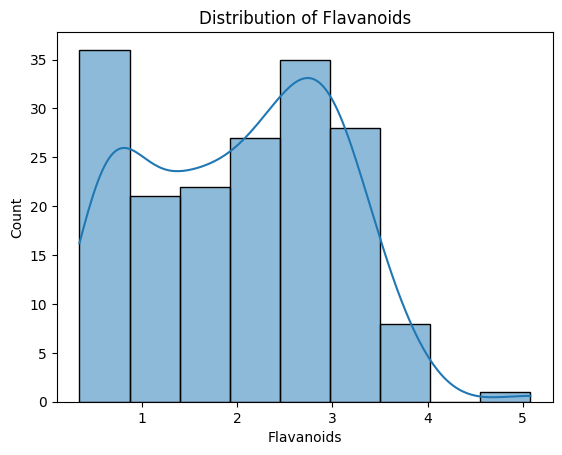

In [48]:
histogram('Flavanoids', df)

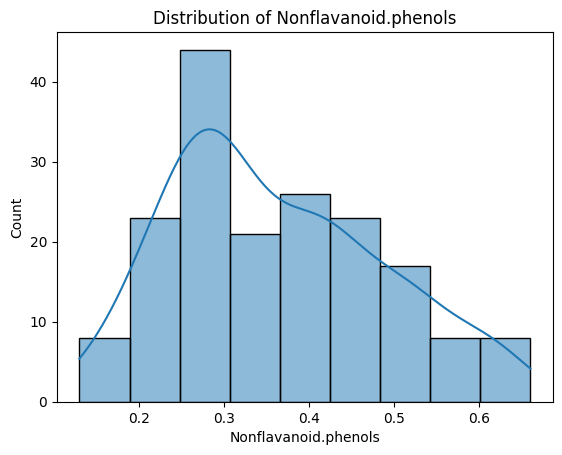

In [49]:
histogram('Nonflavanoid.phenols', df)

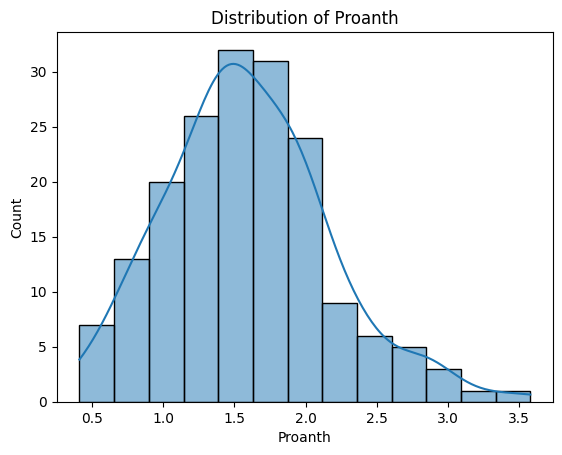

In [50]:
histogram('Proanth', df)

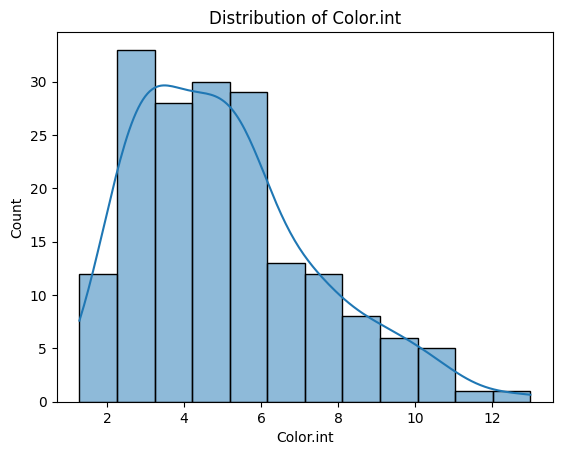

In [51]:
histogram('Color.int', df)

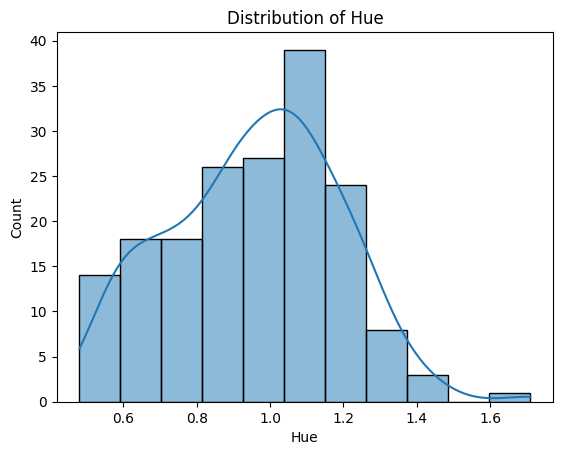

In [52]:
histogram('Hue', df)


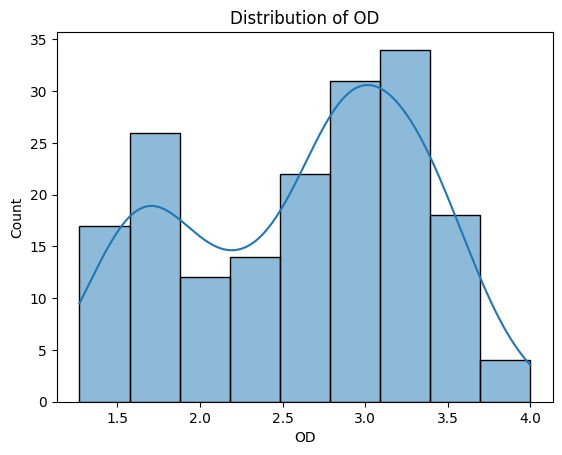

In [53]:
histogram('OD', df)

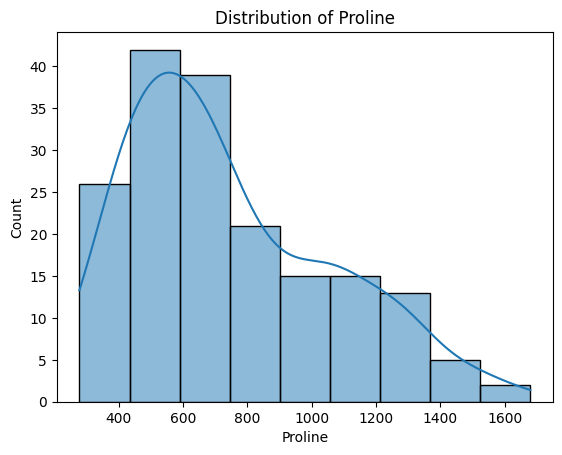

In [54]:
histogram('Proline', df)

## ***Bivariate Analysis***

In [69]:
def scatter(feature1, feature2, data):
     
    custom_palette = ['blue', 'green', 'red']
    sns.scatterplot(x=data[feature1], y=data[feature2], hue=data['Wine'], palette=custom_palette)
    plt.title(f'{feature1} VS {feature2}')
    plt.xlabel(f'{feature1}')
    plt.ylabel(f'{feature2}')

    return plt.show()


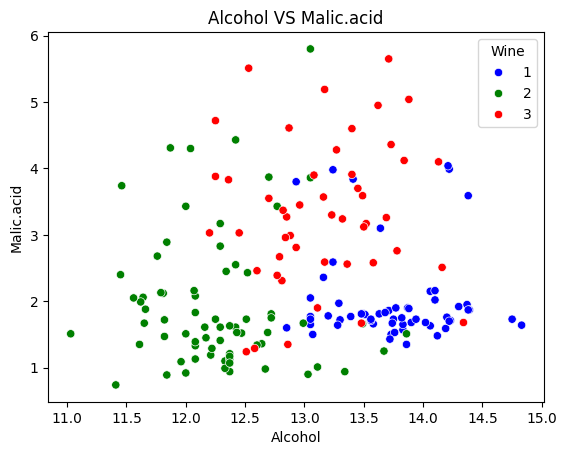

In [70]:
scatter('Alcohol', 'Malic.acid', df)

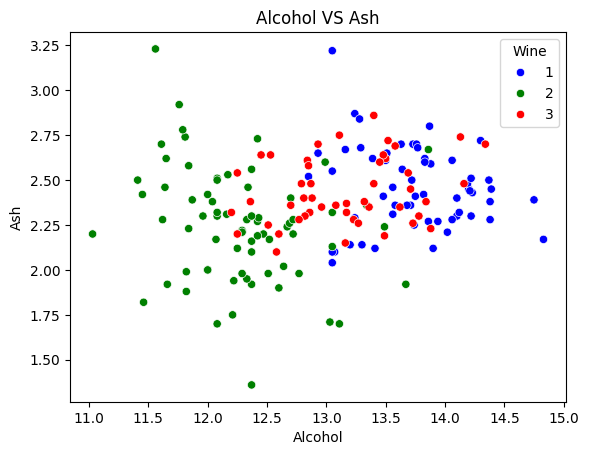

In [71]:
scatter('Alcohol', 'Ash', df)

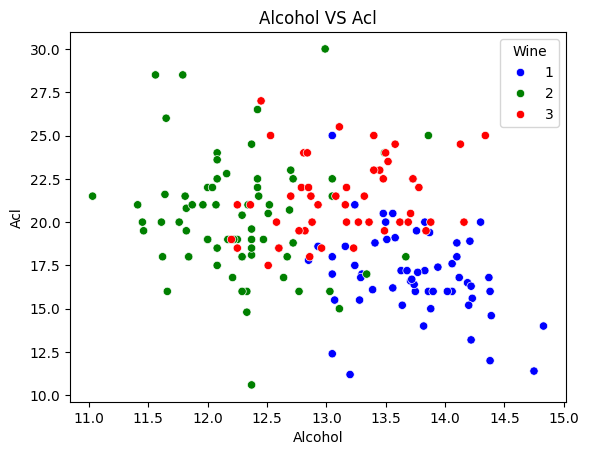

In [72]:
scatter('Alcohol', 'Acl', df)

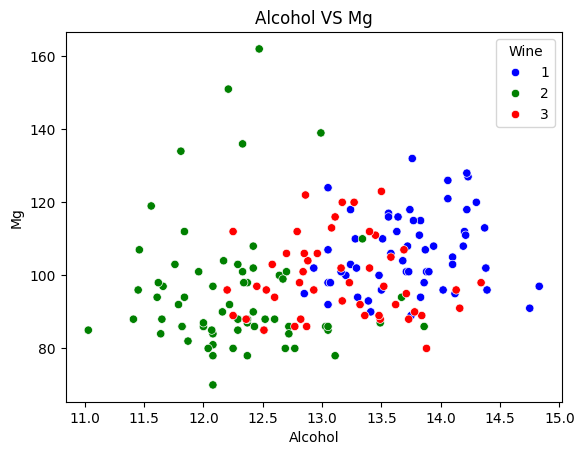

In [73]:
scatter('Alcohol', 'Mg', df)

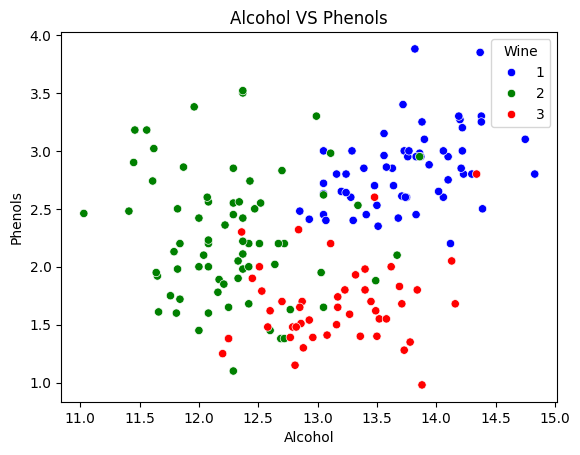

In [74]:
scatter('Alcohol', 'Phenols', df)

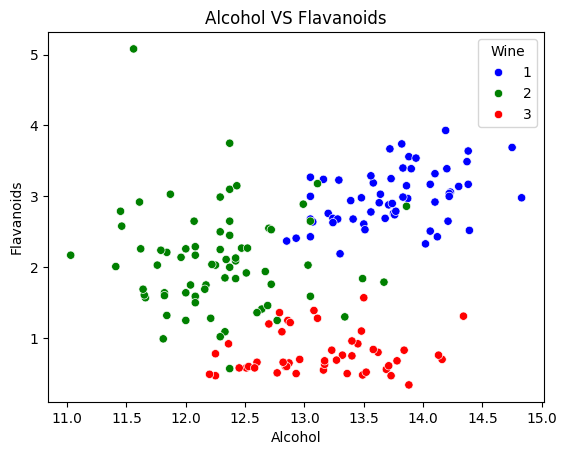

In [75]:
scatter('Alcohol', 'Flavanoids', df)

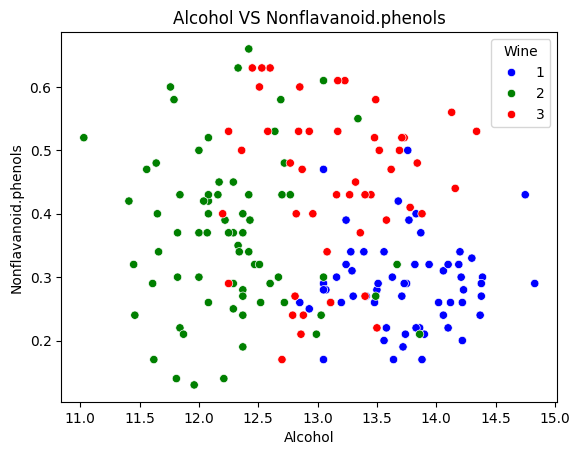

In [76]:
scatter('Alcohol', 'Nonflavanoid.phenols', df)

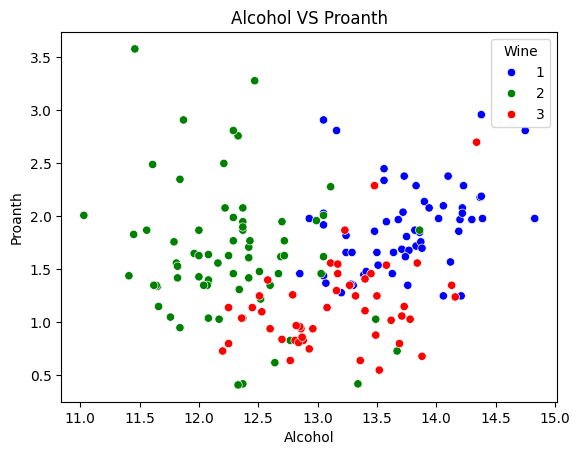

In [78]:
scatter('Alcohol', 'Proanth', df)

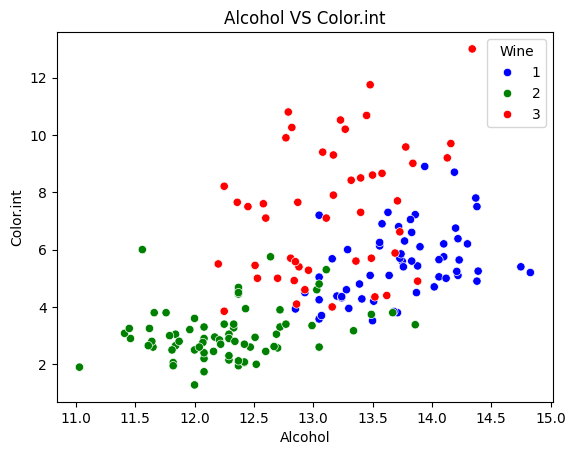

In [79]:
scatter('Alcohol', 'Color.int', df)

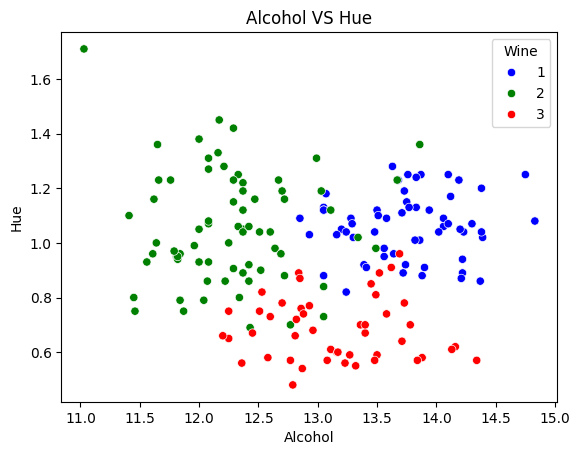

In [80]:
scatter('Alcohol', 'Hue', df)

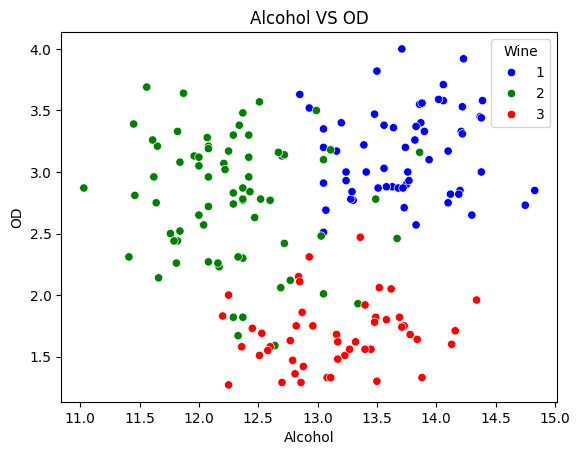

In [81]:
scatter('Alcohol', 'OD', df)

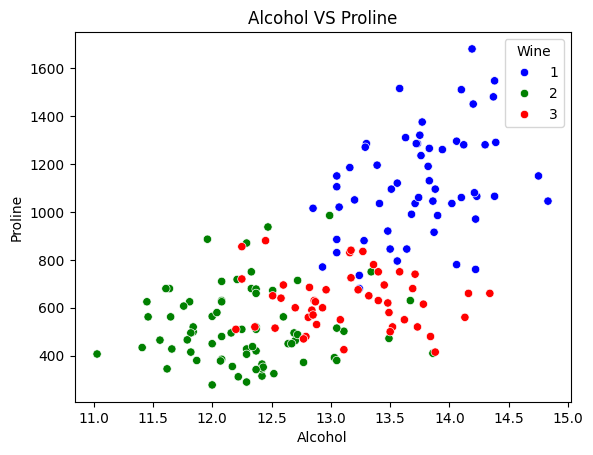

In [82]:
scatter('Alcohol', 'Proline', df)

## ***Multivariate Analysis***

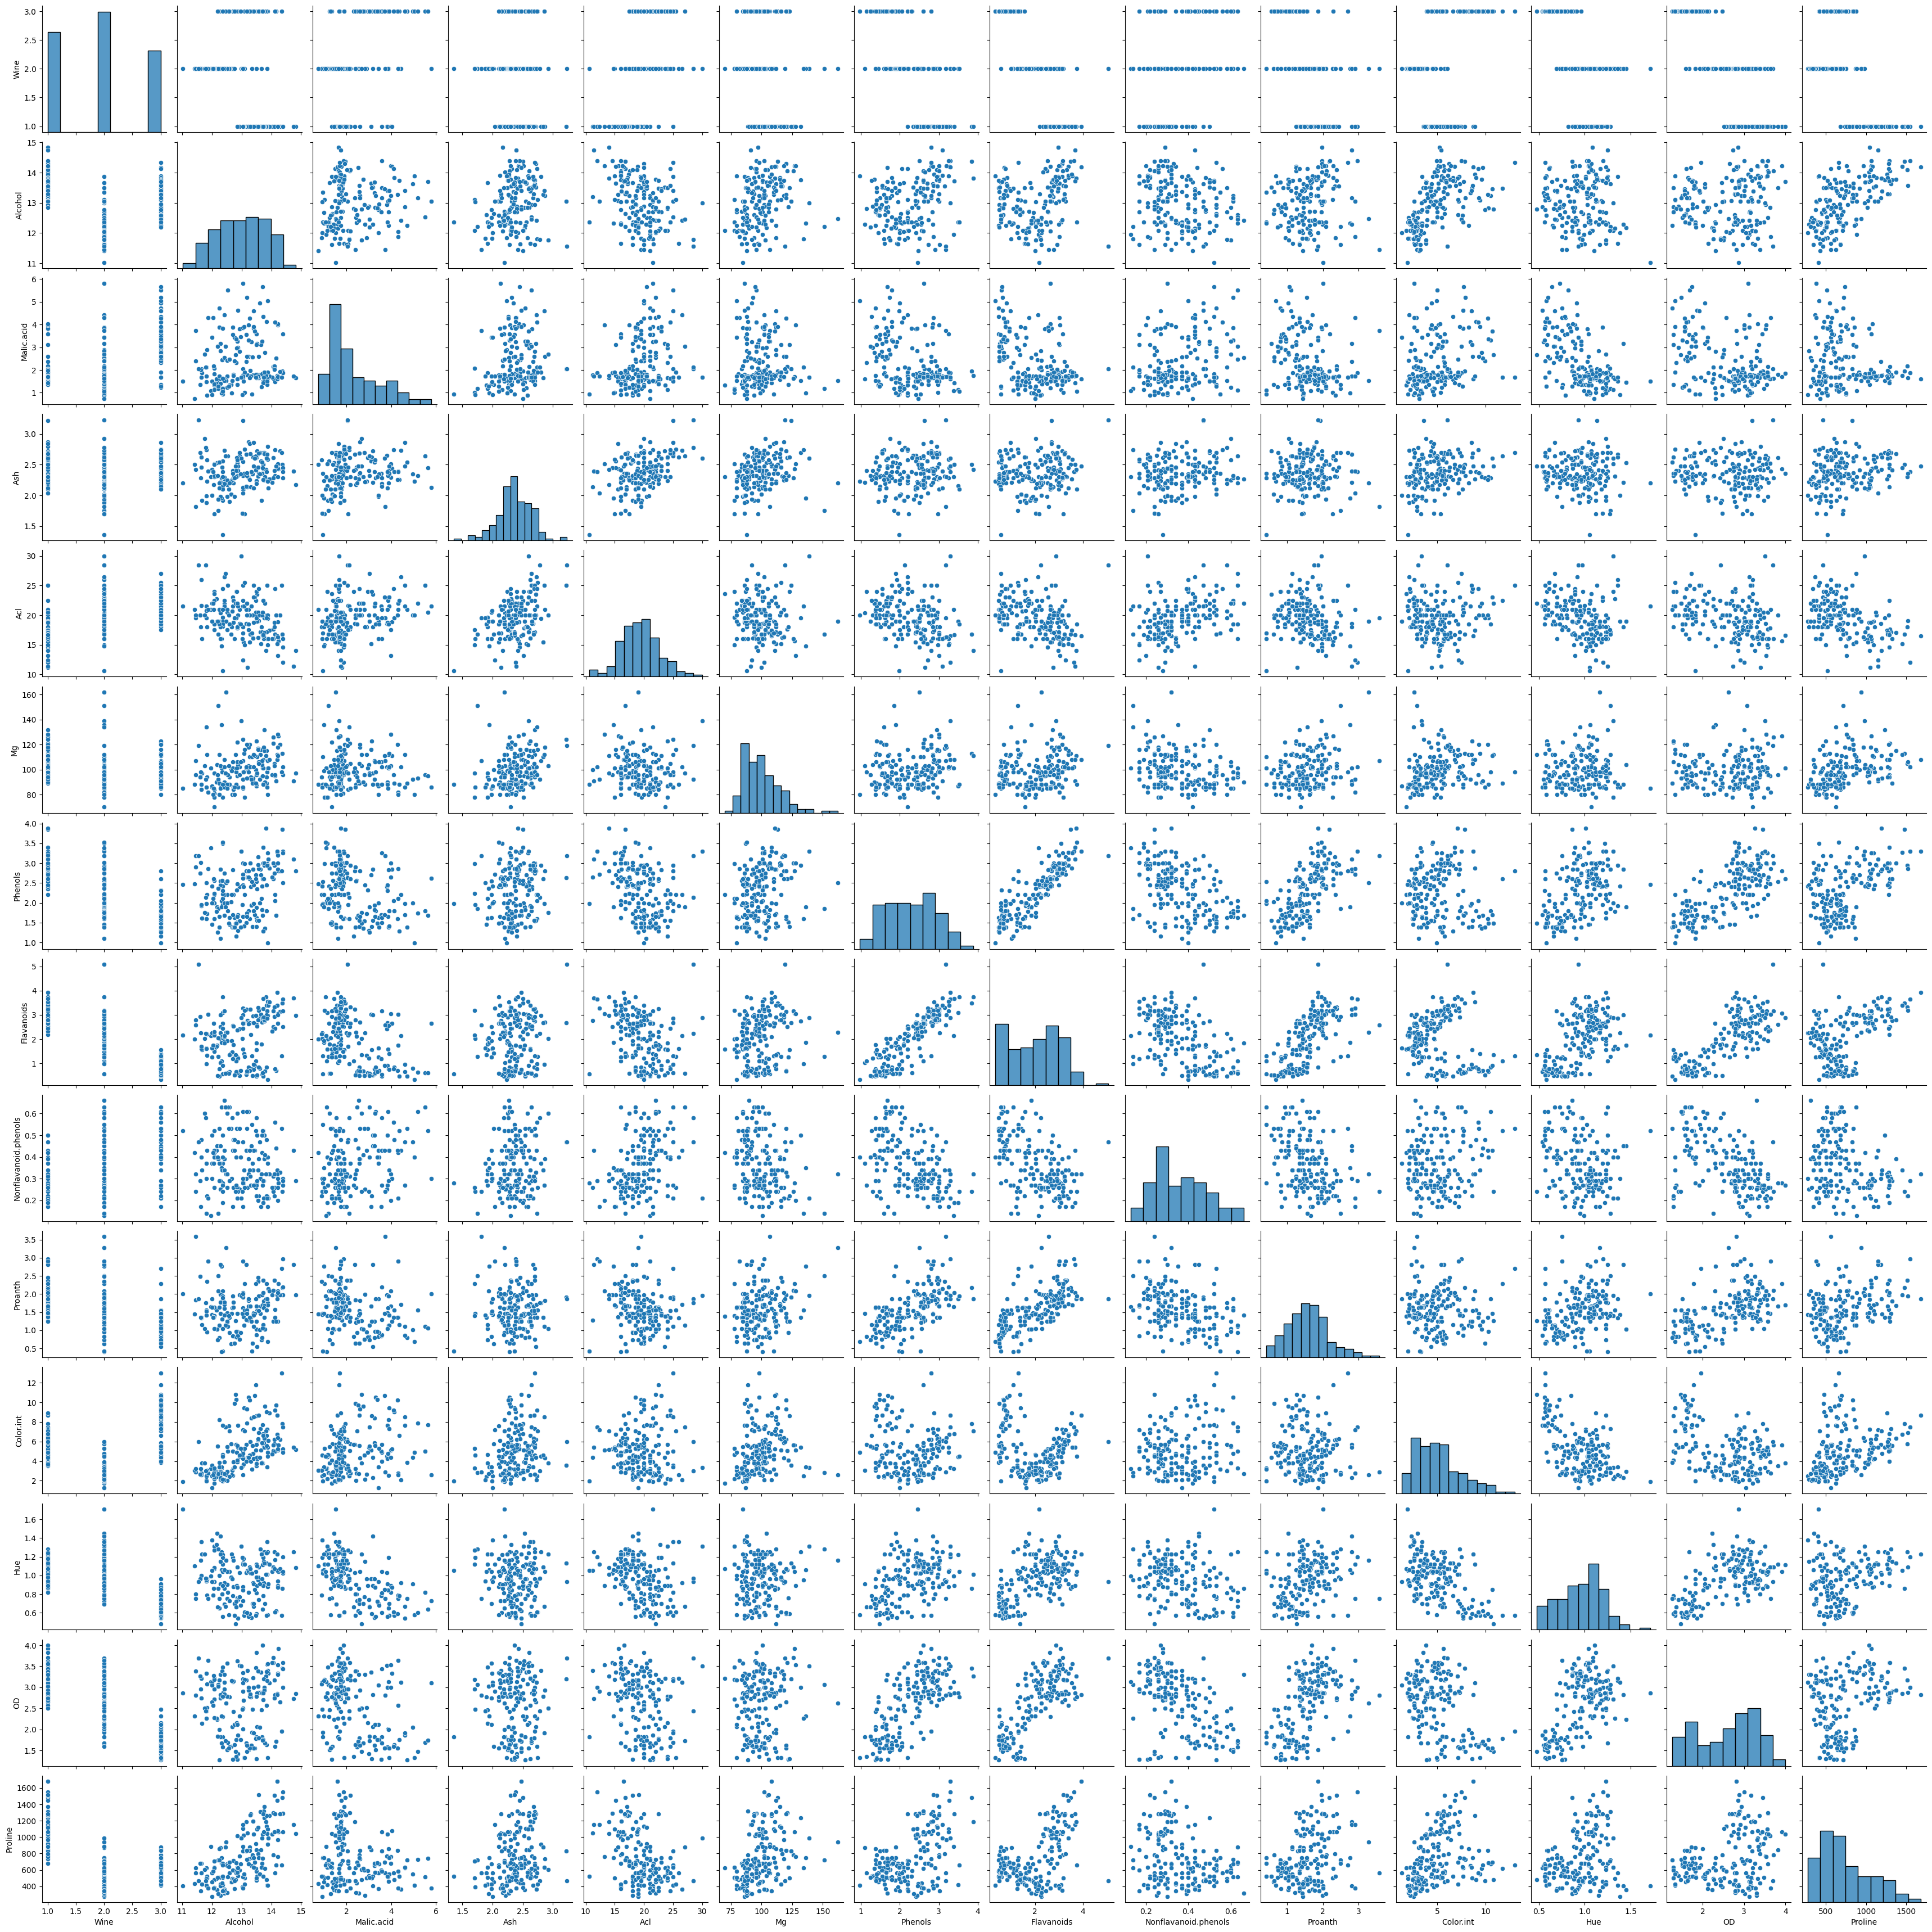

In [91]:
sns.pairplot(data=df)
plt.show()

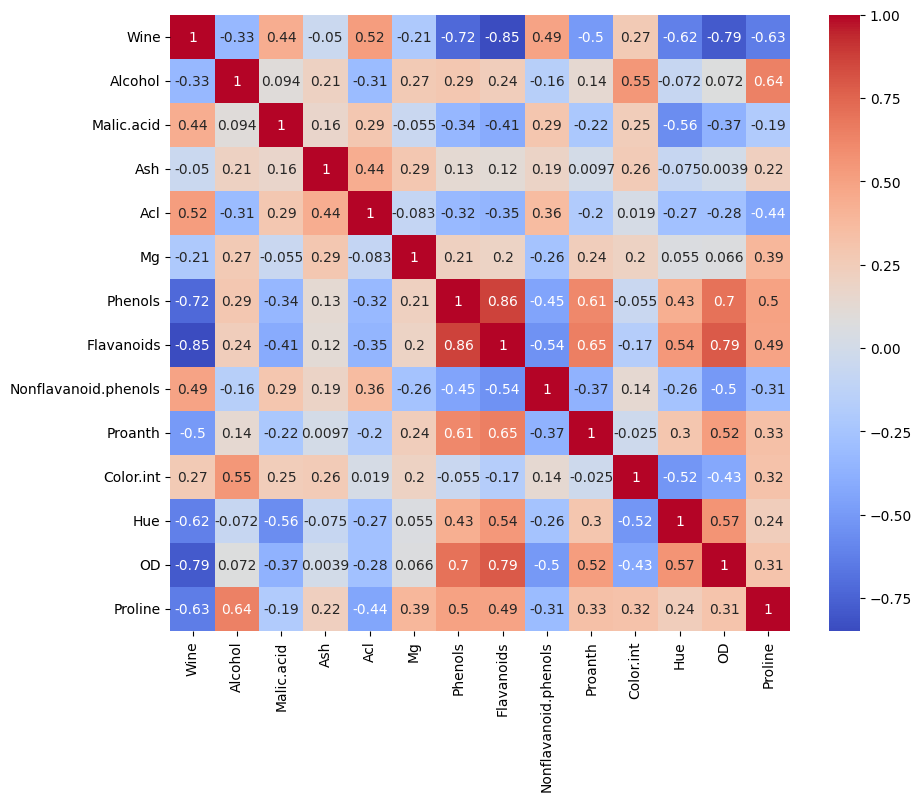

In [99]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=df.corr(), annot=True, cbar=True, cmap='coolwarm')
plt.show()

***
# ***Data Preprocessing***
***

## ***Feature Selection***

***
# ***Modelling***
***